# Jupyter Notebook Project: Understanding the Building Blocks of Neural Networks

**Goal** : To explore the fundamental concepts of neural networks without constructing a full-fledged network.

In [48]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l
import os
import pandas as pd

## Tensor Operations:

**QUESTION 1** : Create two tensors of size (3, 4), one containing only 1s and the other one containing only 2s, and perform element-wise addition, subtraction, and multiplication. Print the results.

In [7]:
x = torch.ones(12).reshape(3,4)
y = torch.ones(12).reshape(3,4) * 2
add = x+y
sub = x-y
mult = x*y
print("Tensor 1 = ",x)
print("Tensor 2 = ",y)

print("Adiidion = ",add)
print("Subtraction = ",sub)
print("Multiplication = ",mult)

Tensor 1 =  tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
Tensor 2 =  tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])
Adiidion =  tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
Subtraction =  tensor([[-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.]])
Multiplication =  tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])


**QUESTION 2**: Gradient Calculation

Let $\mathbf{x}=( x_1 , x_2, x_3 , x_4)$. Use PyTorch's Autograd to calculate the gradient of the function  $y(\mathbf{x})=x_1^2+x_2^2+x_3^2+x_4^2-x_1-x_2-x_3-x_4$ when $\mathbf{x}=( 1,2,3,4)$. Print the gradient in your code, together with $\mathbf{x}$.

In [10]:
x = torch.arange(4, dtype=float)
x.requires_grad_(True)
Y = sum((x**2) - x)
Y.backward()
x.grad


tensor([-1.,  1.,  3.,  5.], dtype=torch.float64)

**QUESTION 3** Linear Algebra Operations

Define matrices:
$$
A=\begin{pmatrix} 1.0 & 2.0 & 3.0 & 4.0\\ 5.0 & 6.0 & 7.0 & 8.0\\ 9.0 & 10.0 & 11.0 & 12.0\end{pmatrix}\\ B=\begin{pmatrix} -1.0 & -2.0 & -2.0 \\ -2.0 & -3.0 & -3.0 \\ -3.0 & -4.0 & -4.0 \end{pmatrix} 
$$

Perform matrix multiplication, transpose, and inversion using PyTorch tensors as follows:
* Calculate and print $BA$ ( the product of matrix $A$ times matrix $B$).
* Calculate and print $A^T$.
* Reshape matrix $A^T$ so it becomes a matrix $B$ of shape $6*2$. Print the reshaped matrix.
* find the sum of elements of $A$ along the second axis and print the result.
* Perform element-wise addition of $B$ with the scalar 5. Print the result of the addition.

In [16]:
A = torch.arange(1,13).reshape(3,4)
B = torch.tensor([-1,-2,-2,-2,-3,-3,-3,-4,-4]).reshape(3,3)
BA = torch.mm(B,A)
At = A.t()
AtReshape = At.reshape(6,2)
Asum = torch.sum(A, dim=1)
Bscale = B + 5
print("A = ",A)
print("B = ",B)
print("B x A = ",BA)
print("A transpose = ",At)
print("A transpose reshape = ",AtReshape)
print("A sum = ",Asum)
print("B scaled = ",Bscale)


A =  tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
B =  tensor([[-1, -2, -2],
        [-2, -3, -3],
        [-3, -4, -4]])
B x A =  tensor([[-29, -34, -39, -44],
        [-44, -52, -60, -68],
        [-59, -70, -81, -92]])
A transpose =  tensor([[ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11],
        [ 4,  8, 12]])
A transpose reshape =  tensor([[ 1,  5],
        [ 9,  2],
        [ 6, 10],
        [ 3,  7],
        [11,  4],
        [ 8, 12]])
A sum =  tensor([10, 26, 42])
B scaled =  tensor([[4, 3, 3],
        [3, 2, 2],
        [2, 1, 1]])


**QUESTION 4** Derivatives

Define a function $h(x) =(\ln(x))^2$. Use **only** automatic differentiation to plot the graph of $f(x)$ and $f^\prime(x)$  together for $x$ in the interval $[1,3]$.

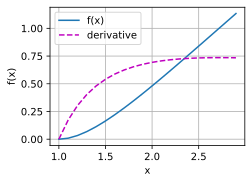

In [45]:

q = torch.arange(1.0,3.0,0.1)
q.requires_grad_(True)
def f(a):
    return torch.log(a)**2
y=f(q)
y.backward(gradient=torch.ones(len(y)))
yprime=q.grad
d2l.plot(q.detach().numpy(), [y.detach().numpy(), yprime.detach().numpy()], 'x', 'f(x)', legend=['f(x)', 'derivative'])

**QUESTION 5**

1. Use pandas to create a data set in your folder that corresponds to this CSV file:

![csv list](customer2.png)

Name that data set `customer_list.csv`.

2. For the `customer_list.csv` file created above modify the data by using imputation on the categorical variable `Gender'` and deleting missing numerical values in the variables `Customer ID`, `Age`, `Purchase Amount` and replacing these data items for the average of the row data.

3. Convert the curated data set `customer_list.csv` into three tensors `X1,X2` and `X3`. where `X1` contains the curated data for `Gender`, `X2` contains the curated data for `customerID,Age` and `X3` contains the data for the curated data for `PurchaseAmount`. Print `X1`,`X2` and `X3`.

In [58]:
if not os.path.exists("data"):
    os.makedirs("data")
data_file = os.path.join("data", "customer_list.csv")
with open(data_file, 'w') as f:
    f.write('''Customer ID,Age,Gender,Purchase amount
123,,Male,130
135,27,,120
112,24,Female,80
142,,Female,30
,,,45
100,19,Male,
,,Female,''')
 
data = pd.read_csv(data_file)
print(data)


data.iloc[:, [0,1,3]]= data.iloc[:, [0,1,3]].fillna(data.iloc[:, [0,1,3]].mean())
gender_dummies = pd.get_dummies(data['Gender'], dummy_na=True)
data = pd.concat([data, gender_dummies], axis=1)
data = data.drop('Gender', axis=1)

print(data)

   Customer ID   Age  Gender  Purchase amount
0        123.0   NaN    Male            130.0
1        135.0  27.0     NaN            120.0
2        112.0  24.0  Female             80.0
3        142.0   NaN  Female             30.0
4          NaN   NaN     NaN             45.0
5        100.0  19.0    Male              NaN
6          NaN   NaN  Female              NaN
   Customer ID        Age  Purchase amount  Female   Male    NaN
0        123.0  23.333333            130.0   False   True  False
1        135.0  27.000000            120.0   False  False   True
2        112.0  24.000000             80.0    True  False  False
3        142.0  23.333333             30.0    True  False  False
4        122.4  23.333333             45.0   False  False   True
5        100.0  19.000000             81.0   False   True  False
6        122.4  23.333333             81.0    True  False  False


**END OF WORKSHEET**

Make sure that you answered all the questions on time. This completed `Jupyter Notebook` will be collected and graded. 

Once the `Jupyter Notebook` is collected it can not be modified.